In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/91951/Desktop/Knn_Data/Classified Data', index_col=0)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [18]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [19]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.30)

## Using KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred = knn.predict(x_test)

## Predictions and Evaluations

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(confusion_matrix(y_test, y_pred))

[[141  18]
 [ 11 130]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       159
           1       0.88      0.92      0.90       141

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Choosing a K Value

In [48]:
error_rate = []
# will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[0.09666666666666666, 0.08666666666666667, 0.06666666666666667, 0.06, 0.07, 0.056666666666666664, 0.07, 0.05333333333333334, 0.06333333333333334, 0.056666666666666664, 0.06666666666666667, 0.056666666666666664, 0.05333333333333334, 0.05, 0.05, 0.04666666666666667, 0.05333333333333334, 0.04666666666666667, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05333333333333334, 0.04666666666666667, 0.056666666666666664, 0.05, 0.06, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.06, 0.05333333333333334, 0.056666666666666664, 0.056666666666666664, 0.056666666666666664]


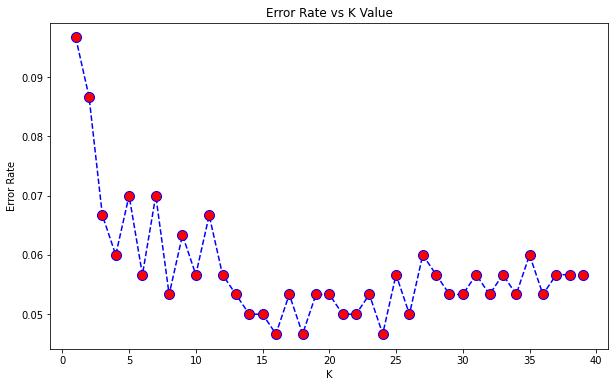

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Now with k =23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('With k=23')
print("\n")
print(confustion_matrix(y_test, pred))
print('\n')